Going as per our Pseudo Code

## Step 1 - Importing relevant libraries

In [88]:
pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
pip install fredapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
import pandas as pd
import numpy as np
import scipy as sp
import quandl

from fredapi import Fred
from datetime import datetime
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA as PCA

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# FRED API key
fred_key = "02e42817b0bcd1d7e7ee373eea6365c0"
fred = Fred(api_key=fred_key)

## Step 2 - Defined Functions

In [93]:
def mPCA(df, num_reconstruct):
    
    df -= df.mean(axis=0)
    R = np.cov(df, rowvar=False)
    eigenvals, eigenvecs = sp.linalg.eigh(R)
    eigenvecs = eigenvecs[:, np.argsort(eigenvals)[::-1]]
    eigenvals = eigenvals[np.argsort(eigenvals)[::-1]]
    eigenvecs = eigenvecs[:, :num_reconstruct]

    return np.dot(eigenvecs.T, df.T).T, eigenvals, eigenvecs

## Step 3 - Importing datasets

### First - Swap rates data

In [94]:
swap_names = ['FRED/DSWP1', 
             'FRED/DSWP2', 
             'FRED/DSWP3', 
             'FRED/DSWP4', 
             'FRED/DSWP5', 
             'FRED/DSWP7', 
             'FRED/DSWP10', 
             'FRED/DSWP30']

swap_df = quandl.get(swap_names)
swap_df = swap_df.dropna()
swap_df.columns = ["SWAP1",
                  "SWAP2",
                  "SWAP3",
                  "SWAP4",
                  "SWAP5",
                  "SWAP7",
                  "SWAP10",
                  "SWAP30"]

cols = ["SWAP1",
        "SWAP2",
        "SWAP3",
        "SWAP5",
        "SWAP7",
        "SWAP10"]


In [95]:
swap_df.head()

,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP7,SWAP10,SWAP30
DATE,,,,,,,,
2000-07-03,7.10,7.16,7.17,7.17,7.17,7.20,7.24,7.24
2000-07-05,7.03,7.06,7.07,7.07,7.08,7.11,7.14,7.16
2000-07-06,7.07,7.13,7.14,7.15,7.16,7.19,7.21,7.21
2000-07-07,7.01,7.04,7.06,7.06,7.07,7.10,7.14,7.14
2000-07-10,7.04,7.09,7.11,7.13,7.14,7.17,7.20,7.19


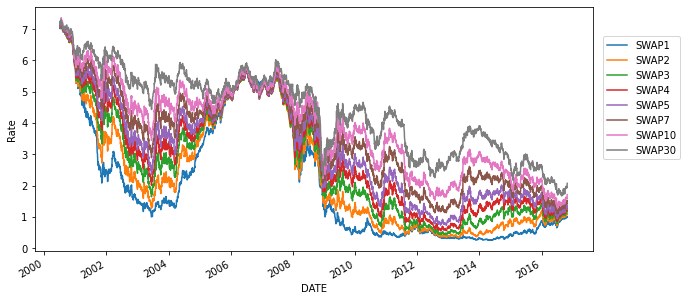

In [96]:
swap_df.plot(figsize=(10,5))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

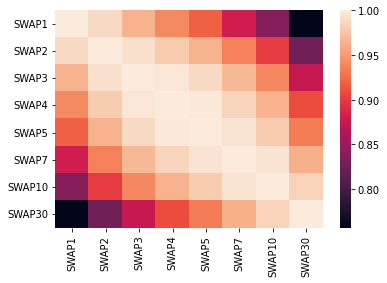

In [97]:
sns.heatmap(swap_df.corr())
plt.show()

In [98]:
swap_df2 = swap_df.copy()
swap_df2 = swap_df2.loc[:, ]

### Second - Treasury rates data

In [99]:
treasury = ['FRED/DGS1MO',
           'FRED/DGS3MO',
           'FRED/DGS6MO',
           'FRED/DGS1',
           'FRED/DGS2',
           'FRED/DGS3',
           'FRED/DGS5',
           'FRED/DGS7',
           'FRED/DGS10',
           'FRED/DGS20',
           'FRED/DGS30']

treasury_df = quandl.get(treasury)
treasury_df.columns = ['TRESY1mo',
                    'TRESY3mo', 
                    'TRESY6mo',
                    'TRESY1y',
                    'TRESY2y',
                    'TRESY3y',
                    'TRESY5y',
                    'TRESY7y',
                    'TRESY10y',
                    'TRESY20y',
                    'TRESY30y']

col = ['TRESY1y',
                    'TRESY2y',
                    'TRESY3y',
                    'TRESY5y',
                    'TRESY7y',
                    'TRESY10y']

In [100]:
treasury_df.head()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN


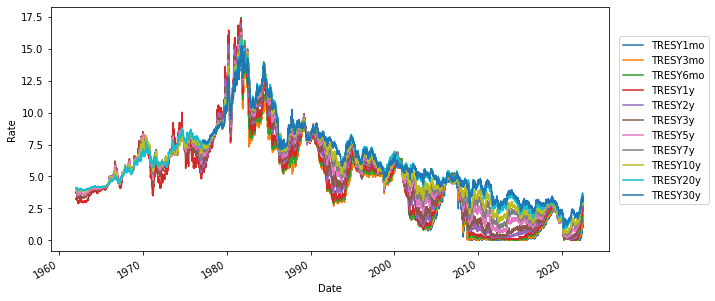

In [101]:
treasury_df.plot(figsize=(10,5))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01,.9), loc=2)
plt.show()

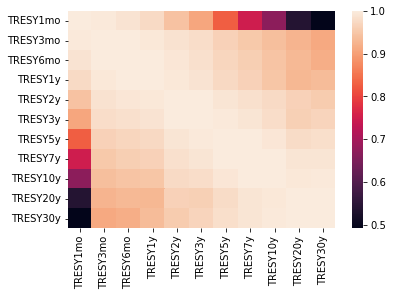

In [102]:
sns.heatmap(treasury_df.corr())
plt.show()

In [103]:
treasury_df

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11,1.58,2.18,2.79,2.97,3.07,3.09,3.05,3.06,2.99,3.43,3.18
2022-07-12,1.63,2.22,2.78,3.07,3.03,3.07,3.01,3.01,2.96,3.37,3.13
2022-07-13,1.78,2.39,2.96,3.21,3.13,3.14,3.02,3.00,2.91,3.35,3.08


In [104]:
treasury_df2 = treasury_df.loc[:, col]
treasury_df2 = treasury_df2.dropna()
combined_df = treasury_df2.merge(swap_df2, left_index=True, right_index=True)
combined_df

,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP7,SWAP10,SWAP30
2000-07-03,6.07,6.31,6.24,6.12,6.19,6.00,7.10,7.16,7.17,7.17,7.17,7.20,7.24,7.24
2000-07-05,6.06,6.29,6.23,6.12,6.18,5.99,7.03,7.06,7.07,7.07,7.08,7.11,7.14,7.16
2000-07-06,6.10,6.34,6.28,6.16,6.24,6.05,7.07,7.13,7.14,7.15,7.16,7.19,7.21,7.21
2000-07-07,6.07,6.29,6.23,6.11,6.17,6.01,7.01,7.04,7.06,7.06,7.07,7.10,7.14,7.14
2000-07-10,6.09,6.31,6.24,6.13,6.21,6.04,7.04,7.09,7.11,7.13,7.14,7.17,7.20,7.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-24,0.66,0.84,1.00,1.27,1.56,1.77,0.99,1.08,1.15,1.22,1.30,1.43,1.61,1.96
2016-10-25,0.66,0.86,1.00,1.29,1.56,1.77,1.00,1.08,1.15,1.22,1.29,1.42,1.59,1.93
2016-10-26,0.67,0.86,1.01,1.30,1.59,1.79,1.01,1.10,1.18,1.25,1.33,1.47,1.64,1.98
2016-10-27,0.68,0.87,1.04,1.33,1.64,1.85,1.00,1.11,1.20,1.29,1.38,1.53,1.71,2.07


Also importing the U.S. Treasury Maturity Rate.

In [105]:
startDate = '2000-01-01'
endDate = '2023-01-01'
df = []
ids = ['DGS{}'.format(i) for i in ['1MO', '3MO', '6MO', 1,2,5,7,10,20,30]]
for s in ids:
    df.append(fred.get_series(s, observation_start=startDate, observation_end=endDate)/100)
  
df = pd.concat(df,axis=1)
df.columns = ids
maturity_df = df.dropna()

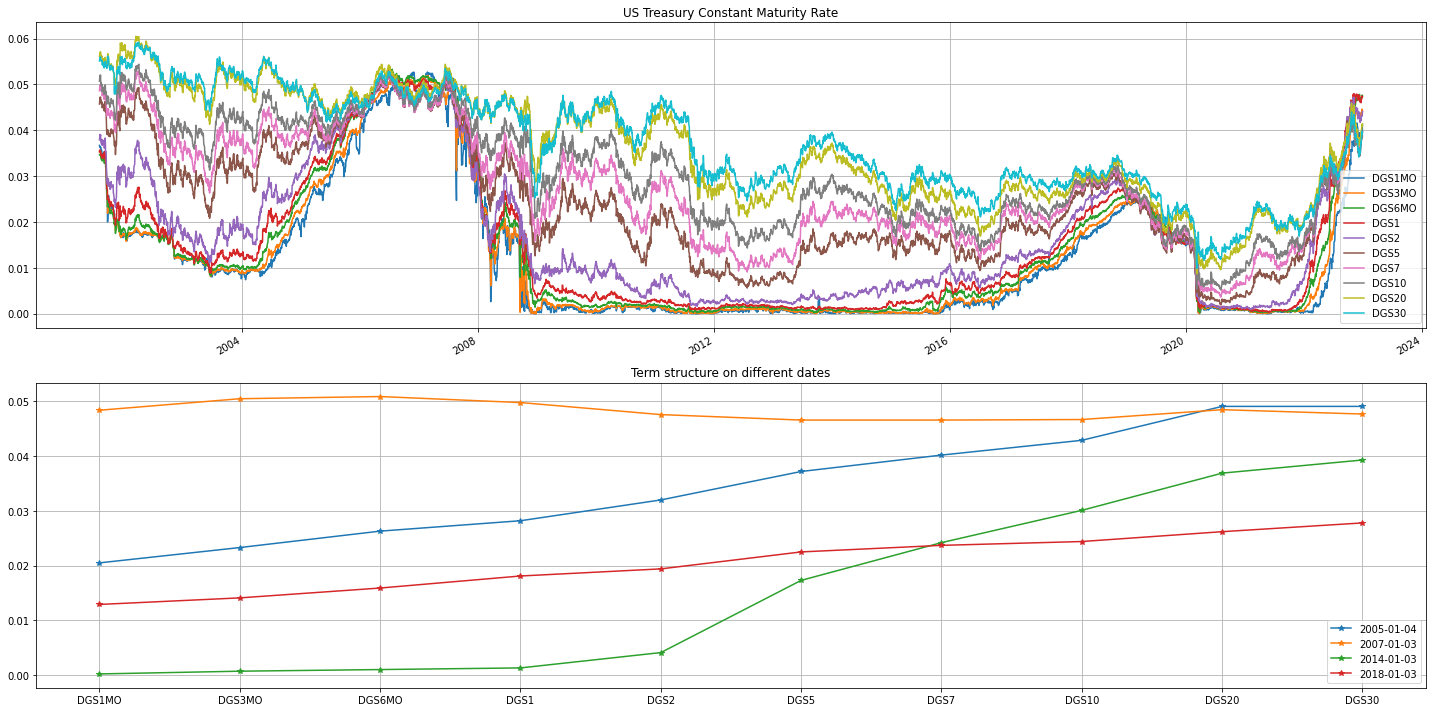

In [106]:
fig,(ax,ax2)=plt.subplots(nrows=2,ncols=1,figsize=(20,5*2))
maturity_df.plot(grid=True,title='US Treasury Constant Maturity Rate',ax=ax)
x = maturity_df.loc[[datetime(2005,1,4),datetime(2007,1,3),datetime(2014,1,3),datetime(2018,1,3)],:]
x.index = [t.date() for t in x.index]
ax.legend(loc='lower right')
ax2.plot(x.T.index,x.T,marker='*')
ax2.legend(x.index, loc='lower right')
ax2.grid(True)
ax2.set_title('Term structure on different dates')
fig.tight_layout()

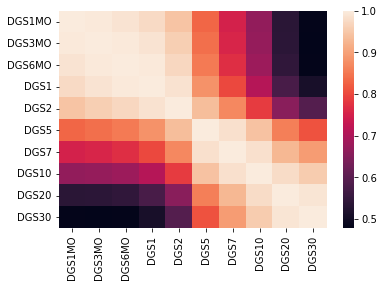

In [107]:
sns.heatmap(maturity_df.corr())
plt.show()

### Third - Spread rate data

In [108]:
spread = [combined_df.SWAP1-combined_df.TRESY1y, 
        combined_df.SWAP2-combined_df.TRESY2y,
       combined_df.SWAP3-combined_df.TRESY3y,
       combined_df.SWAP5-combined_df.TRESY5y,
       combined_df.SWAP7-combined_df.TRESY7y,
       combined_df.SWAP10-combined_df.TRESY10y]
spread_df = pd.DataFrame(np.array(spread).T, index=combined_df.index, 
                         columns = ["SPREAD1y", "SPREAD2y", "SPREAD3y", "SPREAD5y", "SPREAD7y", "SPREAD10y"])

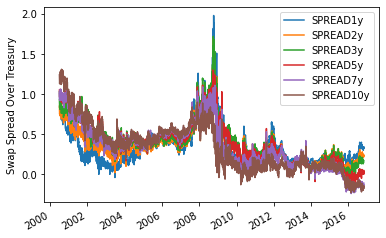

In [109]:
spread_df.plot()
plt.ylabel("Swap Spread Over Treasury")
plt.show()

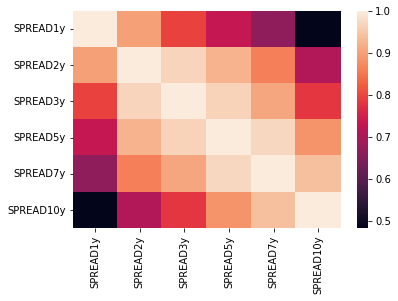

In [110]:
sns.heatmap(spread_df.corr())
plt.show()

## Step 4 - Cleaning Data

In [118]:
swap_df.isnull().sum()

SWAP1     0
SWAP2     0
SWAP3     0
SWAP4     0
SWAP5     0
SWAP7     0
SWAP10    0
SWAP30    0
dtype: int64

In [120]:
treasury_df2.isnull().sum()

TRESY1y     0
TRESY2y     0
TRESY3y     0
TRESY5y     0
TRESY7y     0
TRESY10y    0
dtype: int64

In [111]:
spread_df.isnull().sum()

SPREAD1y     0
SPREAD2y     0
SPREAD3y     0
SPREAD5y     0
SPREAD7y     0
SPREAD10y    0
dtype: int64

We can see that there are no outliers nor null values. So, the data is clean.

In [125]:
swap_df2.describe()

,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP7,SWAP10,SWAP30
count,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000
mean,2.105755,2.390218,2.688190,2.953082,3.181395,3.534772,3.872545,4.394841
std,1.913386,1.832076,1.765902,1.699581,1.636723,1.534743,1.445819,1.331056
min,0.250000,0.340000,0.420000,0.560000,0.730000,1.100000,1.280000,1.670000
25%,0.490000,0.780000,1.060000,1.370000,1.660000,2.140000,2.552500,3.190000
50%,1.330000,1.800000,2.310000,2.770000,3.125000,3.610000,4.070000,4.620000
75%,3.507500,3.920000,4.197500,4.450000,4.580000,4.830000,5.020000,5.390000
max,7.130000,7.220000,7.250000,7.270000,7.290000,7.320000,7.360000,7.300000


In [122]:
treasury_df2.describe()

,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y
count,11528.000000,11528.000000,11528.000000,11528.000000,11528.000000,11528.000000
mean,4.729735,5.023472,5.198956,5.515355,5.766339,5.948340
std,3.833076,3.803110,3.718687,3.570421,3.455406,3.335662
min,0.040000,0.090000,0.100000,0.190000,0.360000,0.520000
25%,1.240000,1.540000,1.690000,2.340000,2.780000,3.010000
50%,4.770000,4.860000,4.935000,5.220000,5.510000,5.610000
75%,6.980000,7.480000,7.660000,7.830000,7.990000,8.090000
max,17.310000,16.950000,16.590000,16.270000,16.050000,15.840000


In [113]:
spread_df.describe()

,SPREAD1y,SPREAD2y,SPREAD3y,SPREAD5y,SPREAD7y,SPREAD10y
count,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000
mean,0.344640,0.366984,0.408210,0.395076,0.351932,0.337499
std,0.238055,0.228002,0.257108,0.267024,0.278854,0.301934
min,-0.040000,0.020000,-0.040000,-0.140000,-0.240000,-0.230000
25%,0.180000,0.200000,0.210000,0.170000,0.130000,0.100000
50%,0.260000,0.330000,0.390000,0.390000,0.350000,0.340000
75%,0.430000,0.440000,0.500000,0.520000,0.520000,0.540000
max,1.980000,1.690000,1.720000,1.300000,1.110000,1.310000


## Step 5 - Visualizing Data

### Box - Plot

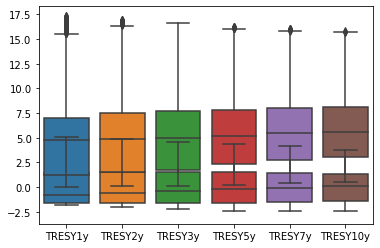

In [123]:
sns.boxplot(data=swap_df)

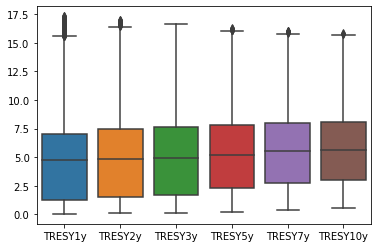

In [121]:
sns.boxplot(data=treasury_df2)

### Skewness - Kurtosis

,Median price,Mean price,Mean vs. Median price,Skewness,Kurtosis
SPREAD1y,0.26,0.34,0.08,1.98,5.44
SPREAD2y,0.33,0.37,0.04,1.46,2.83
SPREAD3y,0.39,0.41,0.02,1.09,1.62
SPREAD5y,0.39,0.40,0.01,0.56,-0.14
SPREAD7y,0.35,0.35,0.00,0.34,-0.42
SPREAD10y,0.34,0.34,-0.00,0.59,0.01


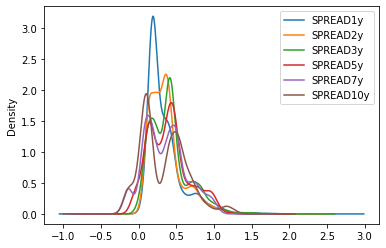

In [114]:
spread_df.plot(kind = 'density')
all = pd.DataFrame()
all['Median price'] = spread_df.median()
all['Mean price'] = spread_df.mean()
all['Mean vs. Median price'] = all['Mean price'] - all['Median price']
all['Skewness'] = spread_df.skew()
all['Kurtosis'] = spread_df.kurt()
all.round(2)

### Histogram Plot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


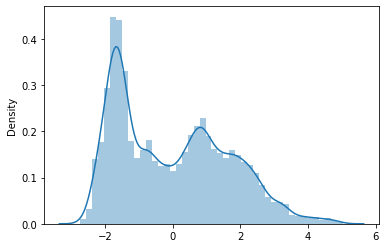

In [135]:
sns.distplot(swap_df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


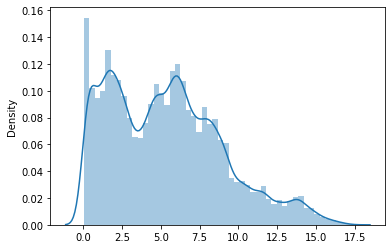

In [136]:
sns.distplot(treasury_df2)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


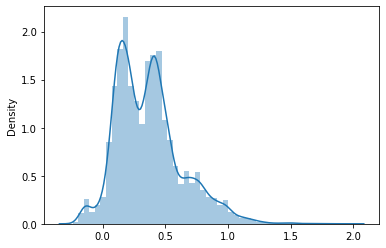

In [137]:
sns.distplot(spread_df)

## Step 6 - Apply PCA to data

### PCA components for the swap data.

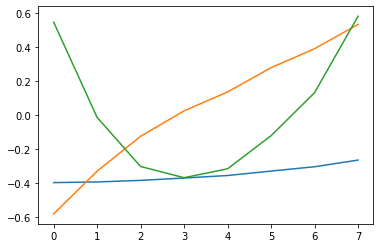

In [115]:
scores, evals, evecs = mPCA(swap_df, 8)
evecs_swaps = pd.DataFrame(evecs)
plt.plot(evecs.loc[:, 0:2])
plt.show()

In [116]:
pca_swap = PCA(n_components=8)
pca_swap.fit(swap_df)
PCA(copy=True, iterated_power='auto', n_components=8, random_state=None, svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=8)

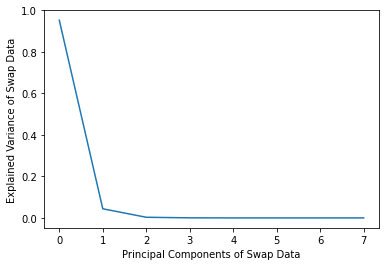

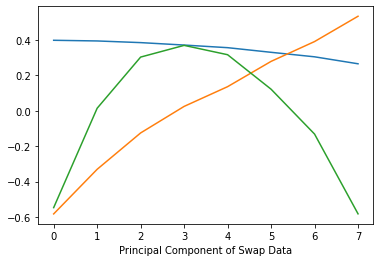

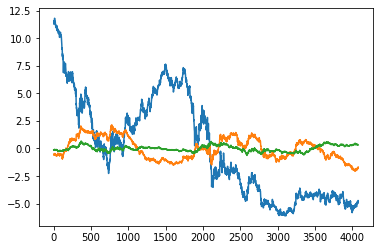

In [117]:
plt.plot(pca_swap.explained_variance_ratio_)
plt.xlabel("Principal Components of Swap Data")
plt.ylabel("Explained Variance of Swap Data")
plt.show()

plt.plot(pca_swap.components_[0:3].T)
plt.xlabel("Principal Component of Swap Data")
plt.show()

vals = pca_swap.transform(swap_df)
plt.plot(vals[:,0:3])
plt.show()

Since the model's variance is virtually entirely explained by the first three main components, we should be able to recreate our initial dataset using only these three components while mostly preserving its original properties.

In [132]:
pca_swap = PCA(n_components=3)
pca_swap.fit(swap_df)
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None, svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=3)

### PCA components for the treasury data.

In [130]:
pca_tres = PCA(n_components=3)
pca_tres.fit(treasury_df2)
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None, svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=3)

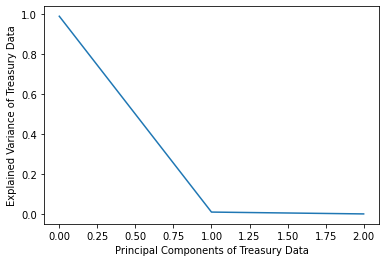

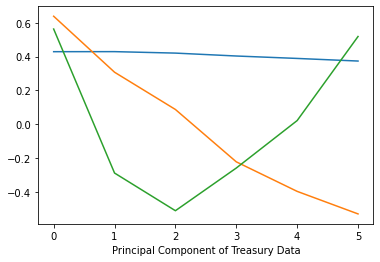

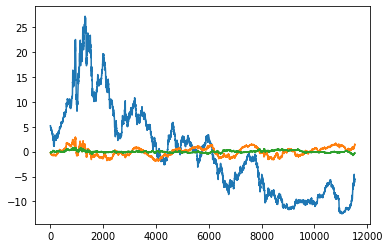

In [131]:
plt.plot(pca_tres.explained_variance_ratio_)
plt.xlabel("Principal Components of Treasury Data")
plt.ylabel("Explained Variance of Treasury Data")
plt.show()

plt.plot(pca_tres.components_[0:3].T)
plt.xlabel("Principal Component of Treasury Data")
plt.show()

vals = pca_tres.transform(treasury_df2)
plt.plot(vals[:,0:3])
plt.show()

### PCA components for the spread data.

In [133]:
pca_spre = PCA(n_components=3)
pca_spre.fit(spread_df)
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None, svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=3)

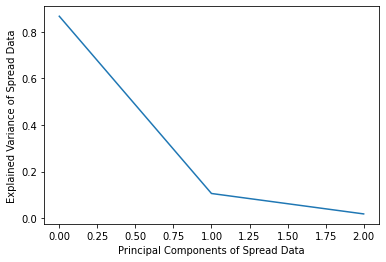

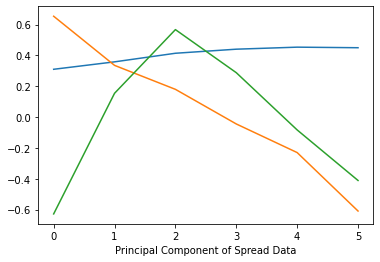

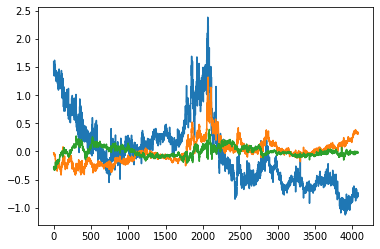

In [134]:
plt.plot(pca_spre.explained_variance_ratio_)
plt.xlabel("Principal Components of Spread Data")
plt.ylabel("Explained Variance of Spread Data")
plt.show()

plt.plot(pca_spre.components_[0:3].T)
plt.xlabel("Principal Component of Spread Data")
plt.show()

vals = pca_spre.transform(spread_df)
plt.plot(vals[:,0:3])
plt.show()

## Step 7 - Reconstructing initial datasets

In [146]:
scores_sw, evals_sw, evecs_sw = mPCA(swap_df2, 3)
evecs_swap = pd.DataFrame(evecs_sw)

scores_tr, evals_tr, evecs_tr = mPCA(treasury_df2, 3)
evecs_tres = pd.DataFrame(evecs_tr)

scores_sp, evals_sp, evecs_sp = mPCA(spread_df, 3)
evecs_spre = pd.DataFrame(evecs_sp)

### Swap dataset reconstruction

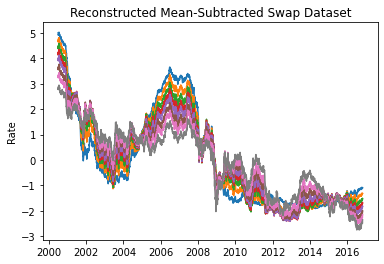

In [153]:
reconst_sw = pd.DataFrame(np.dot(scores_sw,evecs_swap.T), index=swap_df2.index)

plt.plot(reconst_sw)
plt.ylabel("Rate")
plt.title("Reconstructed Mean-Subtracted Swap Dataset")
plt.show()

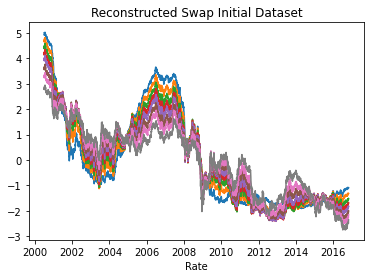

In [157]:
for cols in reconst_sw.columns:
    reconst_sw[cols] = reconst_sw[cols] + swap_df.mean(axis=0)[cols]
    
plt.plot(reconst_sw)
plt.xlabel("Rate") 
plt.title("Reconstructed Swap Initial Dataset")
plt.show()

### Treasury dataset reconstruction

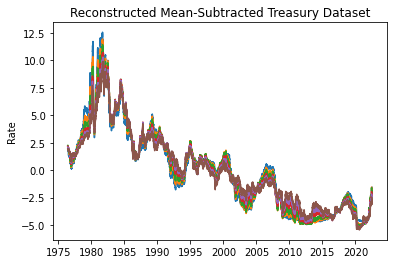

In [148]:
reconst_tr = pd.DataFrame(np.dot(scores_tr,evecs_tres.T), index=treasury_df2.index, columns=col)

plt.plot(reconst_tr)
plt.ylabel("Rate")
plt.title("Reconstructed Mean-Subtracted Treasury Dataset")
plt.show()

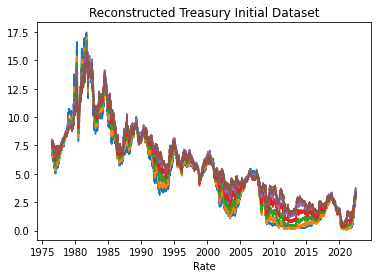

In [158]:
for cols in reconst_tr.columns:
    reconst_tr[cols] = reconst_tr[cols] + treasury_df.mean(axis=0)[cols]
    
plt.plot(reconst_tr)
plt.xlabel("Rate") 
plt.title("Reconstructed Treasury Initial Dataset")
plt.show()

## Futher steps to follow from pseudo code in coming modules